In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
lg = pd.read_csv(r"C:\Users\Admin\Downloads\Movie dataset\IMDB-Movie-Data.csv")
lg

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [3]:
lg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
lg.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [5]:
### Drop All The  Missing Values

lg.dropna(axis=0).isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [6]:
###  Check For Duplicate Data

lg_dup=lg.duplicated().any()

print("Checking duplicate values: ",lg_dup)

Checking duplicate values:  False


In [7]:
### Get Overall Statistics About The DataFrame

lg.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
### Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

lg[lg["Runtime (Minutes)"]>=180]["Title"]

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [9]:
###  In Which Year There Was The Highest Average Voting?

lg.groupby("Year")["Votes"].mean().sort_values(ascending=False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

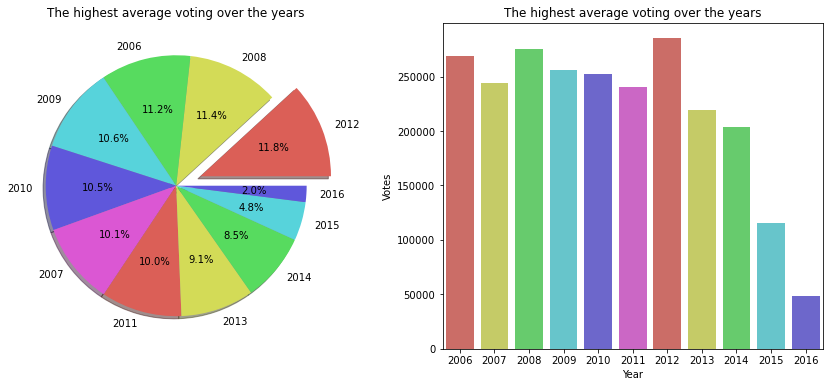

In [10]:
### Preparing the data for visualization
highestvote=lg.groupby("Year")["Votes"].mean().sort_values(ascending=False).reset_index()
highestvoteyear=highestvote["Year"].tolist()
highestvotes=highestvote["Votes"].tolist()
# Pie Chart 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
colors=sns.color_palette('hls')[0:8]
explode=(0.2,0,0,0,0,0,0,0,0,0,0)
plt.pie(highestvotes,labels=highestvoteyear,autopct='%1.1f%%',explode=explode,shadow=True,colors=colors)
plt.title("The highest average voting over the years")
### Barplot 
plt.subplot(1,2,2)
sns.barplot(x="Year",y="Votes",data=highestvote,palette=colors)
plt.title("The highest average voting over the years")
plt.show()

In [11]:
### In Which Year There Was The Highest Average Revenue?

lg.groupby("Year")['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

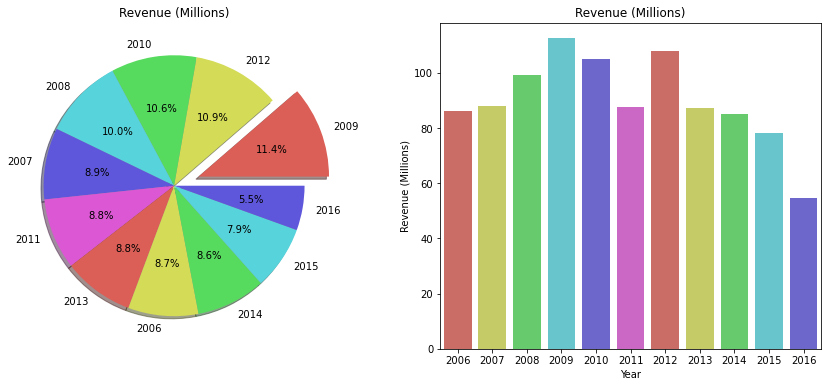

In [12]:
### Preparing the data for visualization
datarevenue=lg.groupby("Year")['Revenue (Millions)'].mean().sort_values(ascending=False).reset_index()
datarevenuelabel=datarevenue['Year'].tolist()
datarevenuere=datarevenue["Revenue (Millions)"].tolist()
### Pie
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
explode=(0.2,0,0,0,0,0,0,0,0,0,0)
colors=sns.color_palette('hls')[0:8]
plt.pie(datarevenuere,labels=datarevenuelabel,autopct='%1.1f%%',shadow=True,explode=explode,colors=colors)
plt.title("Revenue (Millions)")
### Barplot 
plt.subplot(1,2,2)
sns.barplot(x="Year",y="Revenue (Millions)",data=datarevenue,palette=colors)
plt.title("Revenue (Millions)")
plt.show()

In [13]:
###################

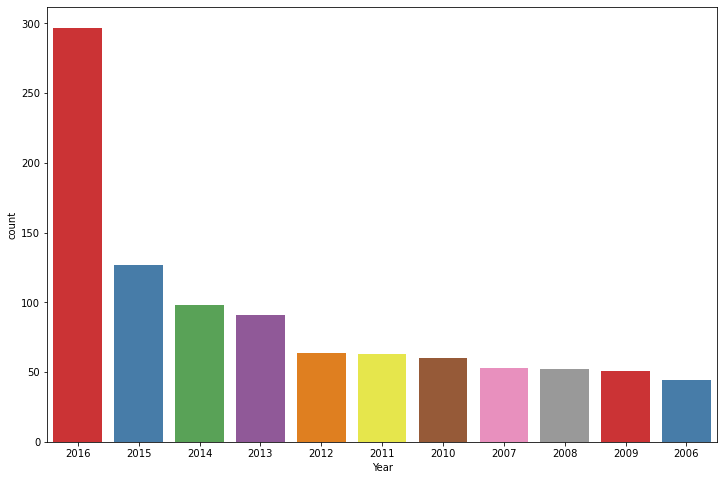

In [14]:
plt.figure(figsize=(12,8))
#sns.set(style="darkgrid")
ax = sns.countplot(x="Year", data=lg, palette="Set1", order=lg["Year"].value_counts().index)

In [15]:
### Find The Average Rating For Each Director

lg.groupby("Director")["Rating"].mean().sort_values(ascending=False).reset_index().head(10)

,Director,Rating
0,Nitesh Tiwari,8.80
1,Christopher Nolan,8.68
2,Olivier Nakache,8.60
3,Makoto Shinkai,8.60
4,Aamir Khan,8.50
5,Florian Henckel von Donnersmarck,8.50
6,Naoko Yamada,8.40
7,Damien Chazelle,8.40
8,Lee Unkrich,8.30
9,Amber Tamblyn,8.30


In [16]:
### The 10 longest lg

lg.nlargest(10,"Runtime (Minutes)")[["Title","Runtime (Minutes)"]]

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
965,Inland Empire,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169


Text(0.5, 1.0, 'The 10 longest lg')

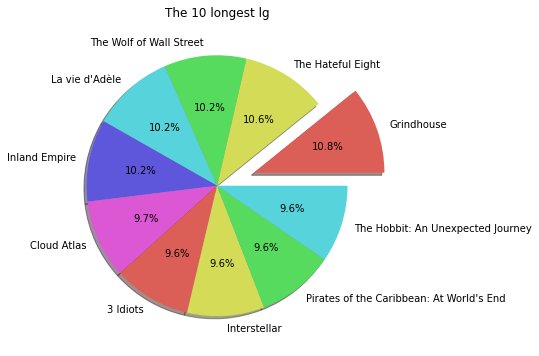

In [17]:
### Preparing the data for visualization
lgtime=lg.nlargest(10,"Runtime (Minutes)")[["Title","Runtime (Minutes)"]]
dataftime=lgtime["Title"].tolist() 
datafmin=lgtime["Runtime (Minutes)"].tolist()
### Pie 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
colors=sns.color_palette('hls')
explode=(0.3,0,0,0,0,0,0,0,0,0)
plt.pie(datafmin,labels=dataftime,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)
plt.title("The 10 longest lg")

In [18]:
### Number of lg by years

datayears=lg["Year"].value_counts().reset_index()
datayears=datayears.rename(columns={"index":"Year","Year":"Count"})
datayears

,Year,Count
0,2016,297
1,2015,127
2,2014,98
3,2013,91
4,2012,64
5,2011,63
6,2010,60
7,2007,53
8,2008,52
9,2009,51


In [19]:
### Find Most Popular Movie Title (Highest Revenue)

lg[lg["Revenue (Millions)"].max()==lg['Revenue (Millions)']]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [20]:
### Display Top 10 Highest Rated Movie Titles And its Directors

titdirector=lg.nlargest(10,"Rating")[["Title","Rating","Director"]]
titdirector

,Title,Rating,Director
54,The Dark Knight,9.0,Christopher Nolan
80,Inception,8.8,Christopher Nolan
117,Dangal,8.8,Nitesh Tiwari
36,Interstellar,8.6,Christopher Nolan
96,Kimi no na wa,8.6,Makoto Shinkai
249,The Intouchables,8.6,Olivier Nakache
64,The Prestige,8.5,Christopher Nolan
99,The Departed,8.5,Martin Scorsese
124,The Dark Knight Rises,8.5,Christopher Nolan
133,Whiplash,8.5,Damien Chazelle


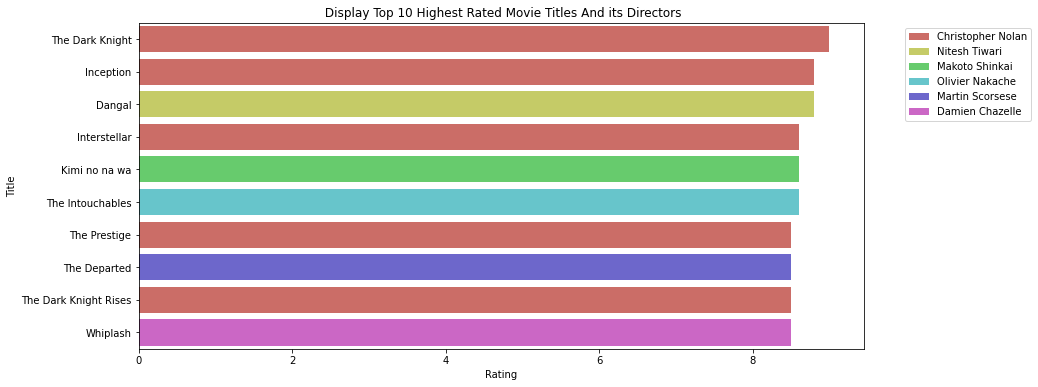

In [21]:
plt.figure(figsize=(13,6))

sns.barplot(y="Title",x="Rating",data=titdirector,hue="Director",dodge=False,palette=colors)
plt.title(" Display Top 10 Highest Rated Movie Titles And its Directors")
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.show()

In [22]:
### Display Top 10 Highest Revenue Movie Titles

lg.nlargest(10,"Revenue (Millions)")[["Title","Revenue (Millions)"]]

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


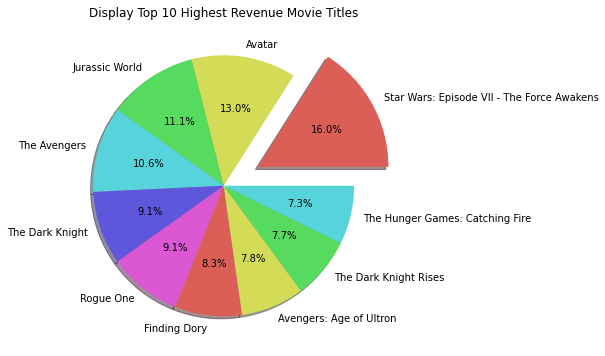

In [23]:
highrevenue=lg.nlargest(10,"Revenue (Millions)")[["Title","Revenue (Millions)"]]
data10=highrevenue["Title"].tolist()
data10revenue=highrevenue["Revenue (Millions)"].tolist()
### Pie Chart
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
colors=sns.color_palette('hls')
explode=(0.3,0,0,0,0,0,0,0,0,0)
plt.pie(data10revenue,labels=data10,data=highrevenue,explode=explode,shadow=True,colors=colors,autopct='%1.1f%%')
plt.title("Display Top 10 Highest Revenue Movie Titles")
plt.show()

In [24]:
### Find Average Rating of Movies Year Wise

lg.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [25]:
lgmean=lg.groupby("Year")["Rating"].mean().sort_values(ascending=False).reset_index()
lgmean

,Year,Rating
0,2007,7.133962
1,2006,7.125000
2,2009,6.960784
3,2012,6.925000
4,2011,6.838095
5,2014,6.837755
6,2010,6.826667
7,2013,6.812088
8,2008,6.784615
9,2015,6.602362


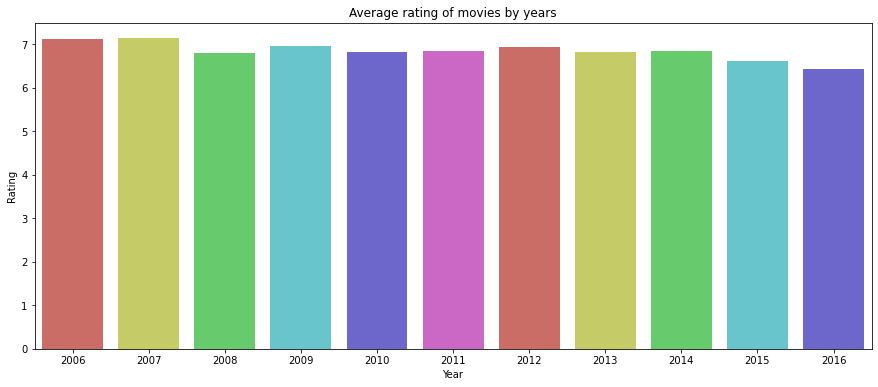

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x="Year",y="Rating",data=lgmean,palette=colors)
plt.title("Average rating of movies by years")
plt.show()

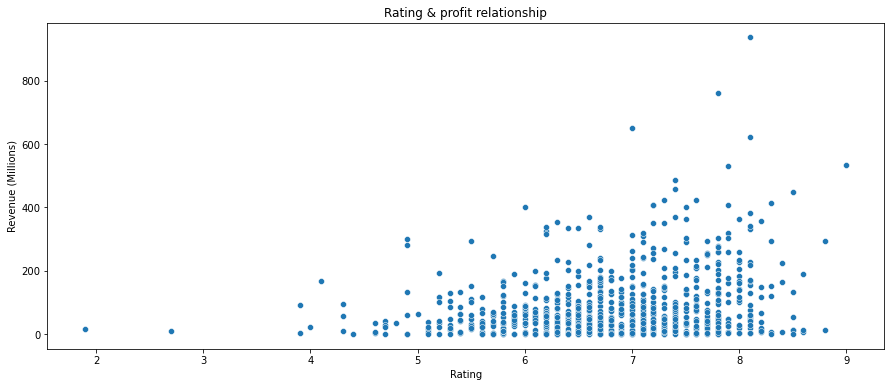

In [27]:
### Does Rating Affect The Revenue?

plt.figure(figsize=(15,6))
sns.scatterplot(x="Rating",y="Revenue (Millions)",data=lg)
plt.title("Rating & profit relationship")
plt.show()

In [28]:
### Classify Movies Based on Ratings

def rating(movie):
    if movie.Rating>=7.0:
        return "High"
    elif movie.Rating<=6.0:
        return "Good"
    else:
        return "Average"

lg["Rating words"]=lg.apply(rating,axis="columns") 

In [29]:
lg["Rating words"].value_counts()

High       445
Average    345
Good       210
Name: Rating words, dtype: int64

In [30]:
datawords=lg["Rating words"].value_counts().reset_index()
datawords=datawords.rename(columns={"index":"Rating Words","Rating words":"Count"})
datawords=datawords.set_index("Rating Words")

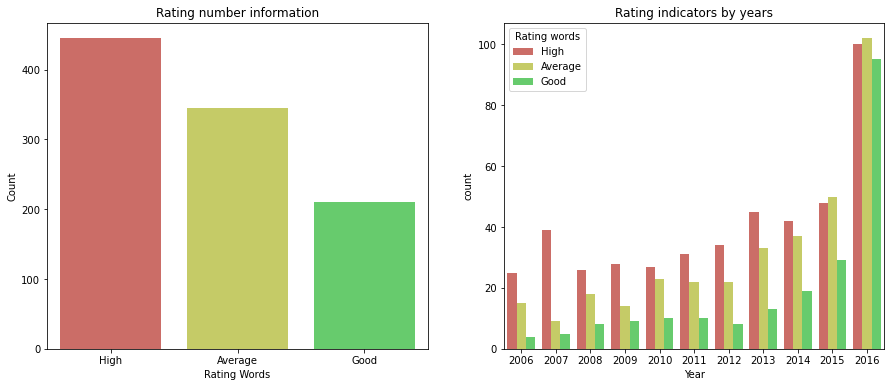

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
colors=sns.color_palette('hls')
sns.barplot(x=datawords.index,y="Count",data=datawords,palette=colors)
plt.title("Rating number information")

plt.subplot(1,2,2)
sns.countplot(x="Year",hue="Rating words",data=lg,palette=colors)
plt.title("Rating indicators by years")
plt.show()

In [32]:
### Information about the genres of lg

lg.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Rating words'],
      dtype='object')

In [33]:
### First, we split the movies with the "split" command and add them to list1
list1=[]
for item in lg["Genre"]:
    list1.append(item.split(","))    

In [34]:
###Secondly, we separate the genres
list2=[]
for item2 in list1:
    for item3 in item2:
        list2.append(item3)

In [35]:
### Number of genres
datagenree=pd.DataFrame(list2,columns=["Genre"]).reset_index()
datagenree=datagenree.drop(["index"],axis=1) 
datagenree.value_counts()

Genre    
Drama        513
Action       303
Comedy       279
Adventure    259
Thriller     195
Crime        150
Romance      141
Sci-Fi       120
Horror       119
Mystery      106
Fantasy      101
Biography     81
Family        51
Animation     49
History       29
Sport         18
Music         16
War           13
Western        7
Musical        5
dtype: int64

In [36]:
### Display Title of the Movie having runtime >=180 Minutes

lg[lg['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [37]:
ratings = pd.DataFrame(lg.groupby('Title')['Rating'].mean())
ratings.head()

,Rating
Title,
(500) Days of Summer,7.7
10 Cloverfield Lane,7.2
10 Years,6.1
12 Years a Slave,8.1
127 Hours,7.6


In [38]:
ratings['num of ratings'] = pd.DataFrame(lg.groupby('Title')['Rating'].count())
ratings.head()

,Rating,num of ratings
Title,,
(500) Days of Summer,7.7,1
10 Cloverfield Lane,7.2,1
10 Years,6.1,1
12 Years a Slave,8.1,1
127 Hours,7.6,1


##########################################

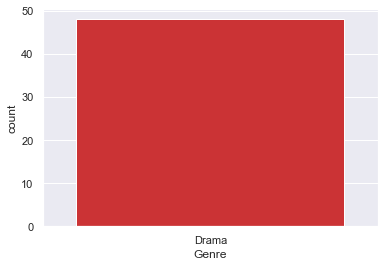

In [43]:
movie=lg[lg['Genre']=='Drama']

sns.set(style="darkgrid")
ax = sns.countplot(x="Genre", data=movie, palette="Set1")

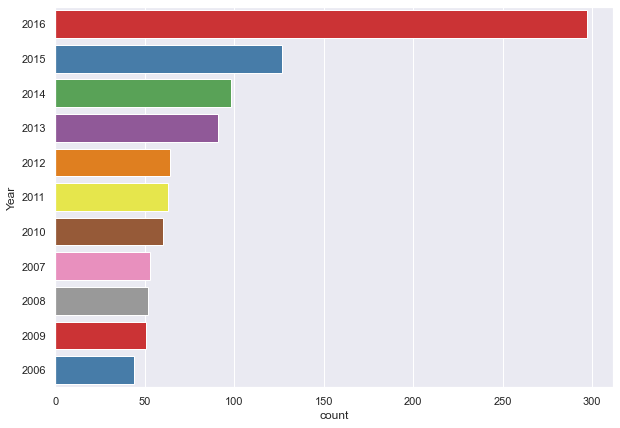

In [45]:
plt.figure(figsize=(10,7))
 #sns.set(style="darkgrid")
ax = sns.countplot(y="Year", data=lg, palette="Set1", order=lg['Year'].value_counts().index[0:15])

# Bivariate Analysis


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


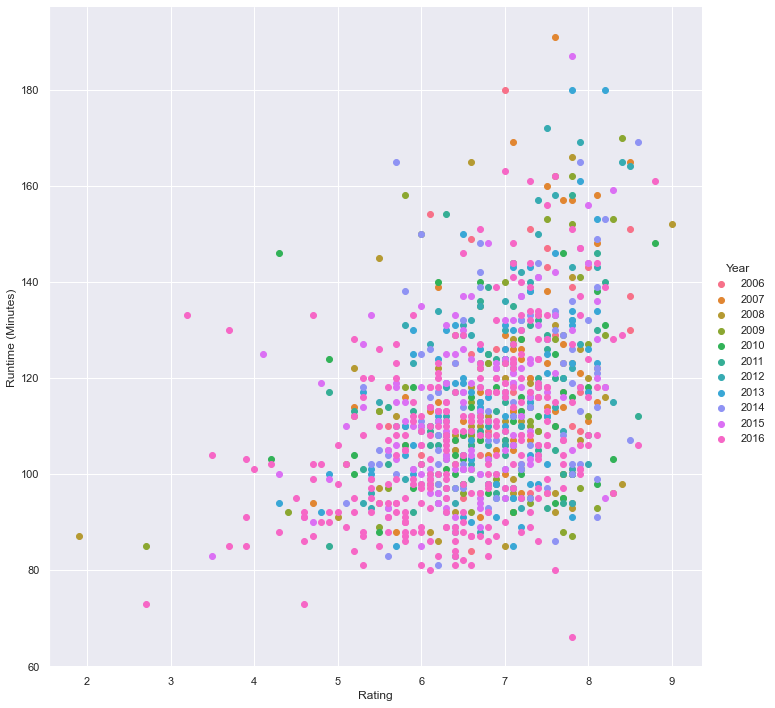

In [46]:
sns.FacetGrid(lg,hue="Year",size=10).map(plt.scatter,"Rating","Runtime (Minutes)").add_legend();
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


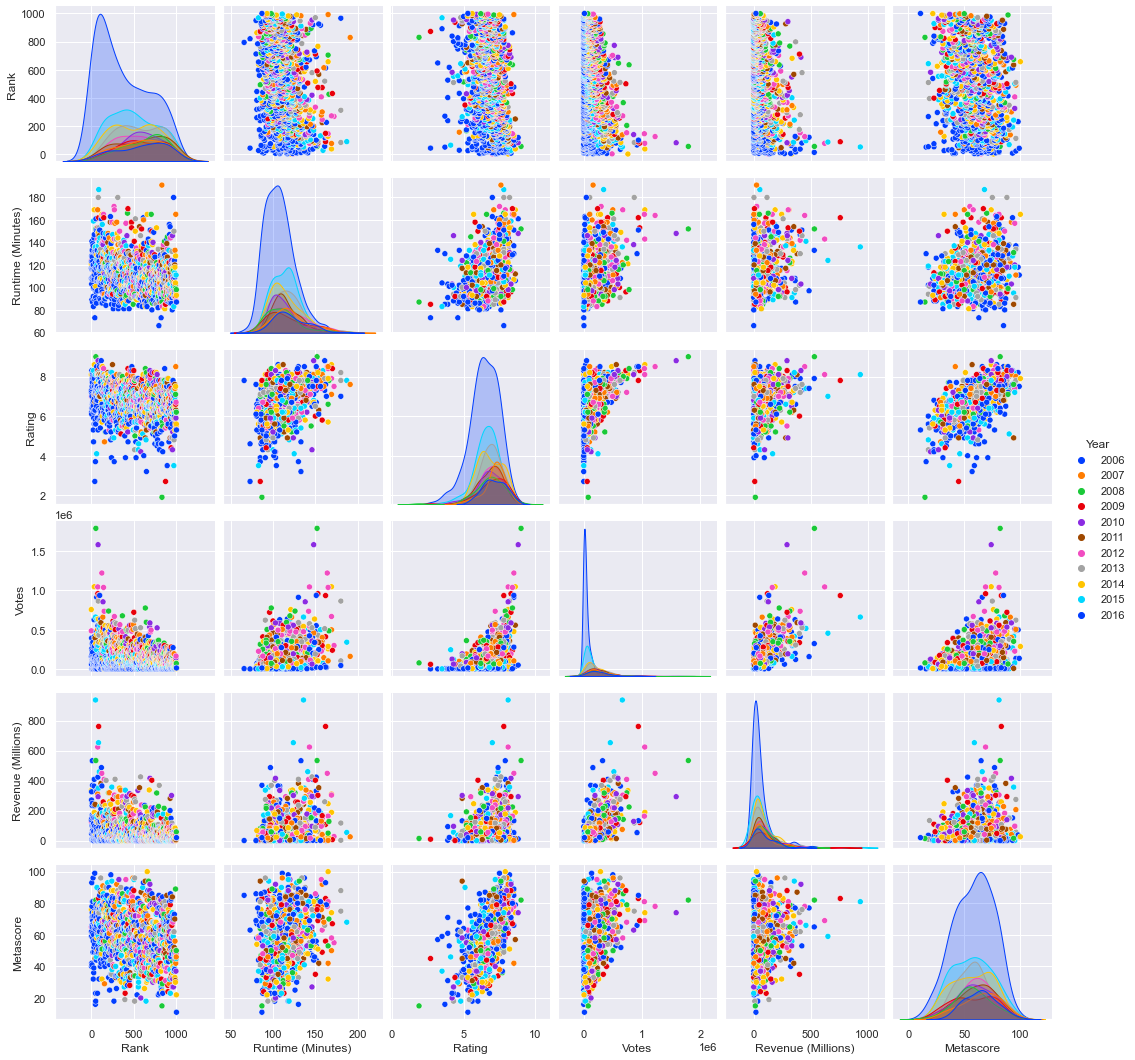

In [47]:
sns.pairplot(lg, hue='Year',palette='bright',size=2.5);

(-0.5, 1199.5, 599.5, -0.5)

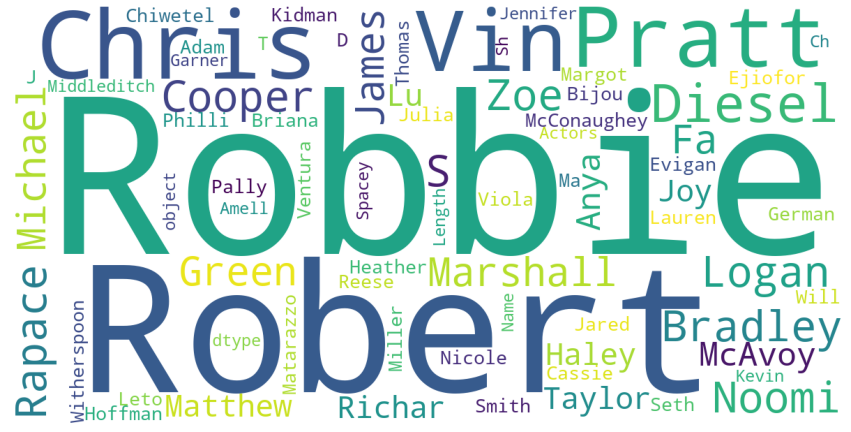

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))

cloud = WordCloud(max_words=2000,width=1200,height=600,background_color="white" ).generate(str(lg.Actors))

plt.imshow(cloud)
plt.axis("off")